# Cheat sheet for seaborn

Notes
- statsmodels needs to be >= 0.8.0

## Forced custom module load

In [3]:
import sys
sys.path.insert(0, r'my_path')
from matplotlib import pyplot as plt
import statsmodels

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.display import display_html
from IPython.display import display

def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    html_str = html_str.replace('table','table style="display:inline; border:0px"')          
    display_html(html_str,raw=True)
    
np.random.seed(1)

## Normal module load

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display_html
from IPython.display import display

def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    html_str = html_str.replace('table','table style="display:inline; border:0px"')          
    display_html(html_str,raw=True)
    
np.random.seed(1)

<h2>Kernel density plot</h2>

C:\Users\voutilainenv\Desktop\Packages\Anaconda\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


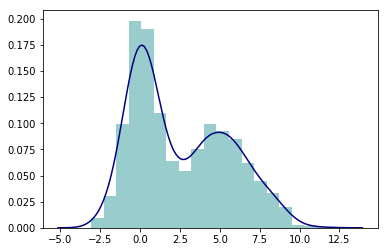

In [3]:
plt.close("all")
df = pd.DataFrame([
    np.random.normal(0,1,1000)
    ,np.random.normal(5,2,1000)       
])
df = df.T
df.columns = ['first', 'second']


v3 = np.concatenate((df['first'], df['second']))
fig = plt.figure()
ax = fig.add_subplot(111)
sns.distplot(v3, hist_kws = {'color': 'Teal'}, kde_kws = {'color': 'Navy'}, ax = ax)
fig

<h2>Different joint plots</h2>

C:\Users\voutilainenv\Desktop\Packages\Anaconda\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


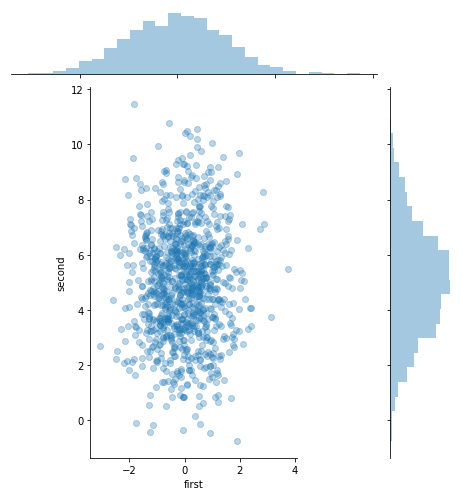

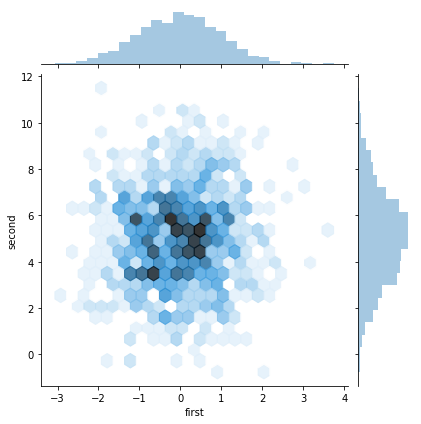

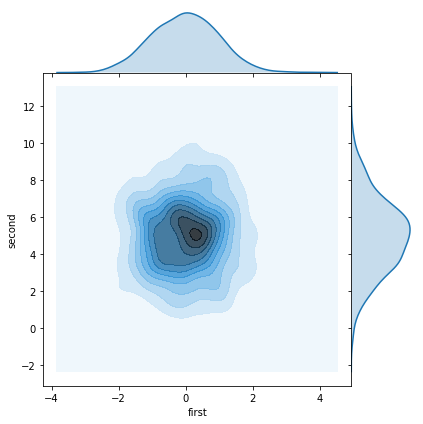

In [4]:
# Seaborn joint plot is a figure level function, resulting in a seaborn
# grid object that cannot be passed into axes of existing figure

plt.close("all")
df = pd.DataFrame([
    np.random.normal(0,1,1000)
    ,np.random.normal(5,2,1000)       
])
df = df.T
df.columns = ['first', 'second']

# Normal joint plot
grid = sns.jointplot(df['first'],df['second'], alpha = 0.3, height = 7)
# access and tweak grid subplots 
grid.ax_joint.set_aspect('equal')

# Hex plot
grid2 = sns.jointplot(df['first'],df['second'], alpha = 0.8, kind = 'hex')

# kde joint plot
grid3 = sns.jointplot(df['first'],df['second'], alpha = 0.8, kind = 'kde', space = 0)

plt.show()

### Two jointplots next to each other

In [25]:
def two_pair_plots(dataf,**kwargs):
    height      = kwargs.get('height', 12)
    ylim1       = kwargs.get('ylim1', None)            
    ylim2       = kwargs.get('ylim2', None)
    
    xlim1       = kwargs.get('xlim1', None)            
    xlim2       = kwargs.get('xlim2', None)    
    
    kind1       = kwargs.get('kind1', "scatter")
    kind2       = kwargs.get('kind2', "scatter")
    alpha1      = kwargs.get('alpha1', 0.3)
    alpha2      = kwargs.get('alpha2', 0.3)
        
    # hack to supress joint plots
    %matplotlib notebook
    plt.ioff()

    # hack to get JointGrids next to eachother
    # https://stackoverflow.com/questions/35042255/how-to-plot-multiple-seaborn-jointplot-in-subplot
    JG1 = sns.jointplot(dataf.iloc[:,0], dataf.iloc[:,1], kind = kind1, alpha = alpha1, height = height)
    JG2 = sns.jointplot(dataf.iloc[:,0], dataf.iloc[:,1], kind = kind2, alpha = alpha2, height = height)

    if ylim1 is not None:
        JG1.ax_marg_x.set_xlim(xlim1)    
    if xlim2 is not None:
        JG2.ax_marg_x.set_xlim(xlim2)
        
    if ylim1 is not None:
        JG1.ax_marg_y.set_ylim(ylim1)    
    if ylim2 is not None:
        JG2.ax_marg_y.set_ylim(ylim2)

    %matplotlib inline
    f = plt.figure()
    for J in [JG1, JG2]:
        for A in J.fig.axes:
            f._axstack.add(f._make_key(A), A)

    #subplots size adjustment
    f.axes[0].set_position([0.05, 0.05, 0.4,  0.4])
    f.axes[1].set_position([0.05, 0.45, 0.4,  0.05])
    f.axes[2].set_position([0.45, 0.05, 0.05, 0.4])
    f.axes[3].set_position([0.55, 0.05, 0.4,  0.4])
    f.axes[4].set_position([0.55, 0.45, 0.4,  0.05])
    f.axes[5].set_position([0.95, 0.05, 0.05, 0.4])    
    

C:\Users\voutilainenv\Desktop\Packages\Anaconda\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


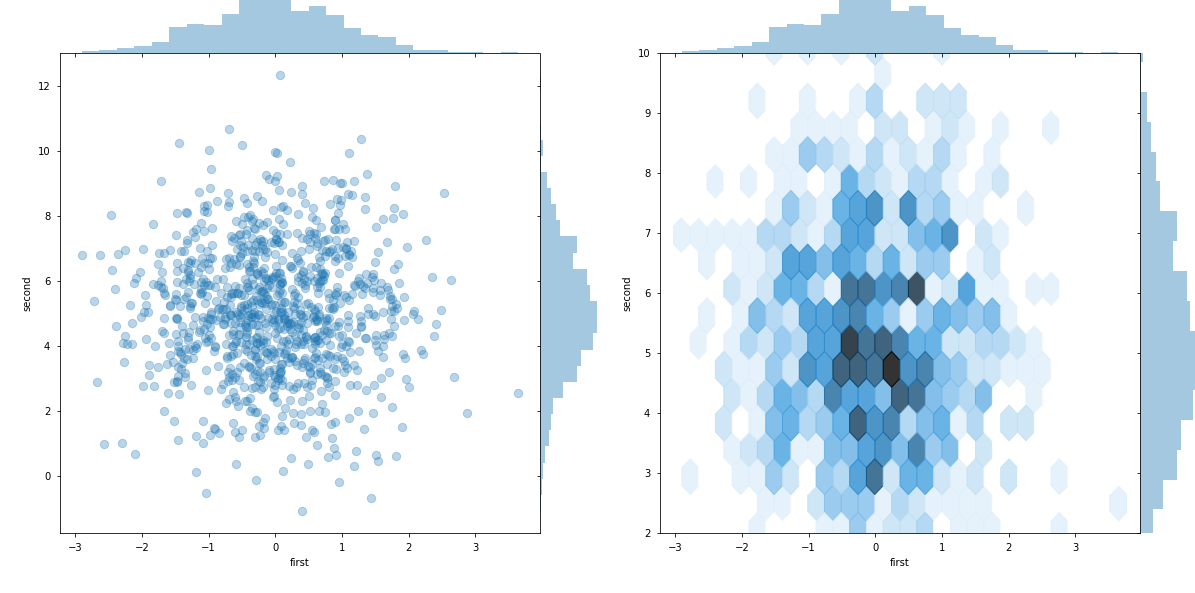

In [26]:
plt.close("all")
df = pd.DataFrame([
    np.random.normal(0,1,1000)
    ,np.random.normal(5,2,1000)       
])
df = df.T
df.columns = ['first', 'second']
two_pair_plots(df, ylim2 = (2,10), kind2 = 'hex', alpha2 = 0.8)

C:\Users\voutilainenv\Desktop\Packages\Anaconda\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


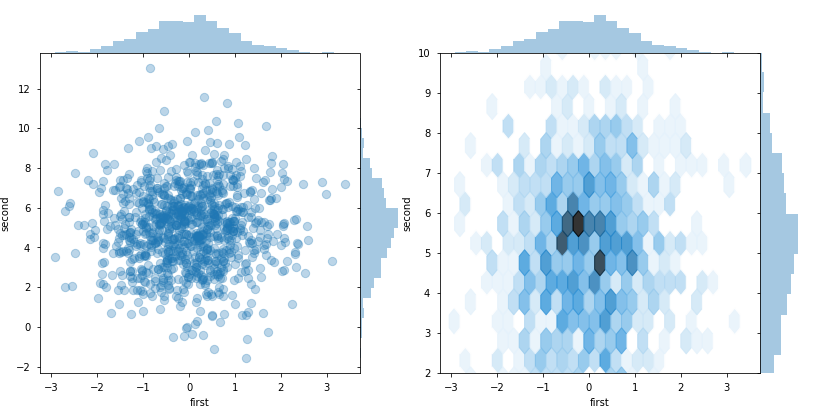

In [7]:
plt.close("all")
df = pd.DataFrame([
    np.random.normal(0,1,1000)
    ,np.random.normal(5,2,1000)       
])
df = df.T
df.columns = ['first', 'second']

# hack to supress joint plots
%matplotlib notebook
plt.ioff()

height = 8
# hack to get JointGrids next to eachother
# https://stackoverflow.com/questions/35042255/how-to-plot-multiple-seaborn-jointplot-in-subplot
JG1 = sns.jointplot(df['first'],df['second'], alpha = 0.3, height = height)
JG2 = sns.jointplot(df['first'],df['second'], alpha = 0.8, kind = 'hex', height = height)
JG2.ax_marg_y.set_ylim(2,10)

%matplotlib inline
f = plt.figure()
for J in [JG1, JG2]:
    for A in J.fig.axes:
        f._axstack.add(f._make_key(A), A)

#subplots size adjustment
f.axes[0].set_position([0.05, 0.05, 0.4,  0.4])
f.axes[1].set_position([0.05, 0.45, 0.4,  0.05])
f.axes[2].set_position([0.45, 0.05, 0.05, 0.4])
f.axes[3].set_position([0.55, 0.05, 0.4,  0.4])
f.axes[4].set_position([0.55, 0.45, 0.4,  0.05])
f.axes[5].set_position([0.95, 0.05, 0.05, 0.4])

## Joint plots with hue (loses edge distributions) 

### categorical hue

,first,second,third,name
0,0.597308,4.896002,-11.367749,name1
1,-1.307199,7.055763,-12.013212,name1
2,-3.187241,5.491519,6.538783,name1
3,-0.991322,4.163363,-1.756357,name1
4,0.993582,3.739456,-2.760449,name1


(0, 12)

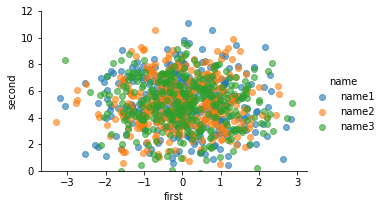

In [28]:
plt.close("all")
df = pd.DataFrame([
     np.random.normal(0,1,1000)
    ,np.random.normal(5,2,1000)
    ,np.random.normal(-2,8,1000)    
])
df = df.T
df['name'] = ['name1']*333 + ['name2']*333 + ['name3']*334
df.columns = ['first', 'second', 'third','name']
display(df.head())


g = sns.lmplot(x='first', y='second', hue='name', data=df, fit_reg=False, height=3, aspect=1.5, scatter_kws = {'alpha': 0.6})
g.axes[0,0].set_ylim((0,12))



### continuous hue

,first,second,third,name
0,-3.204064,5.896790,-17.452511,name1
1,-0.467536,5.919699,-3.283409,name1
2,-0.259530,5.055537,-8.657756,name1
3,0.890784,5.227211,-3.648892,name1
4,0.357457,3.862688,6.210039,name1


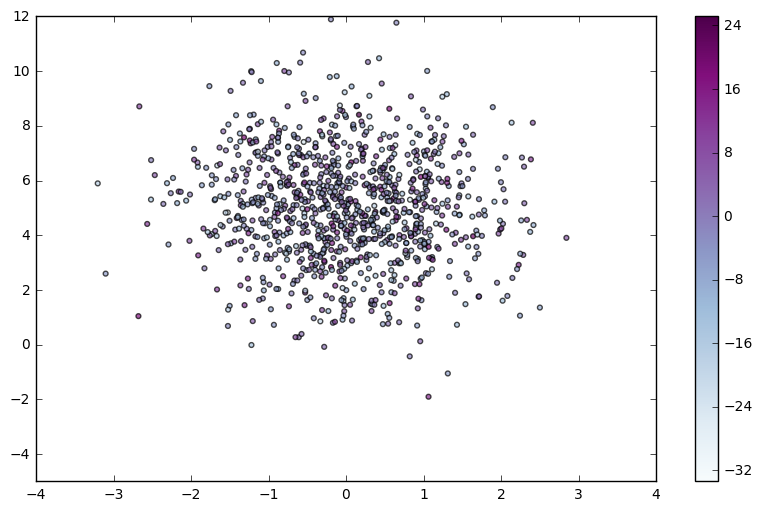

In [12]:
plt.close("all")
df = pd.DataFrame([
     np.random.normal(0,1,1000)
    ,np.random.normal(5,2,1000)
    ,np.random.normal(-2,8,1000)    
])
df = df.T
df['name'] = ['name1']*333 + ['name2']*333 + ['name3']*334
df.columns = ['first', 'second', 'third','name']
display(df.head())

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
#cm = plt.cm.get_cmap('RdYlBu')
cm = plt.cm.get_cmap('BuPu')
sc = ax.scatter(df['first'], df['second'], c=df['third'], vmin = df['third'].min(), vmax=df['third'].max(), s=12, cmap=cm, alpha = 0.7)
ax.set_xlim(-4,4)
ax.set_ylim(-5,12)
color_bar = plt.colorbar(sc)
color_bar.set_alpha(1) # force color bar alpha = 1
color_bar.draw_all()
fig


<h2>Pair plot</h2>

,first,second,third,name
0,1.351321,5.482103,1.113628,name1
1,-0.348350,7.224510,-2.841714,name1
2,-0.062201,5.070384,-3.549421,name1
3,0.184909,3.801593,-8.470678,name1
4,-0.385953,7.525015,-8.923649,name1


C:\Users\voutilainenv\Desktop\Packages\Anaconda\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


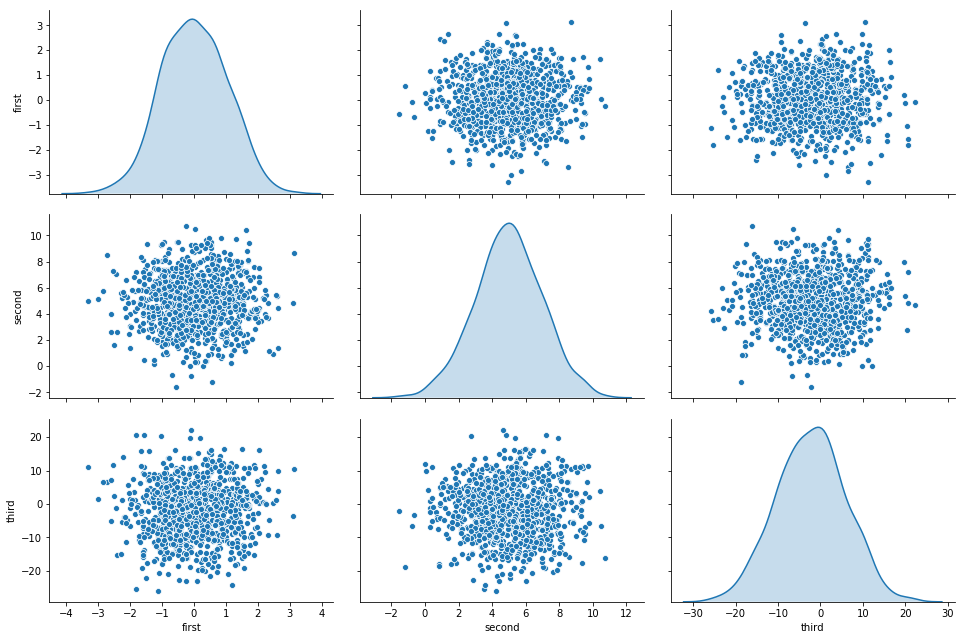

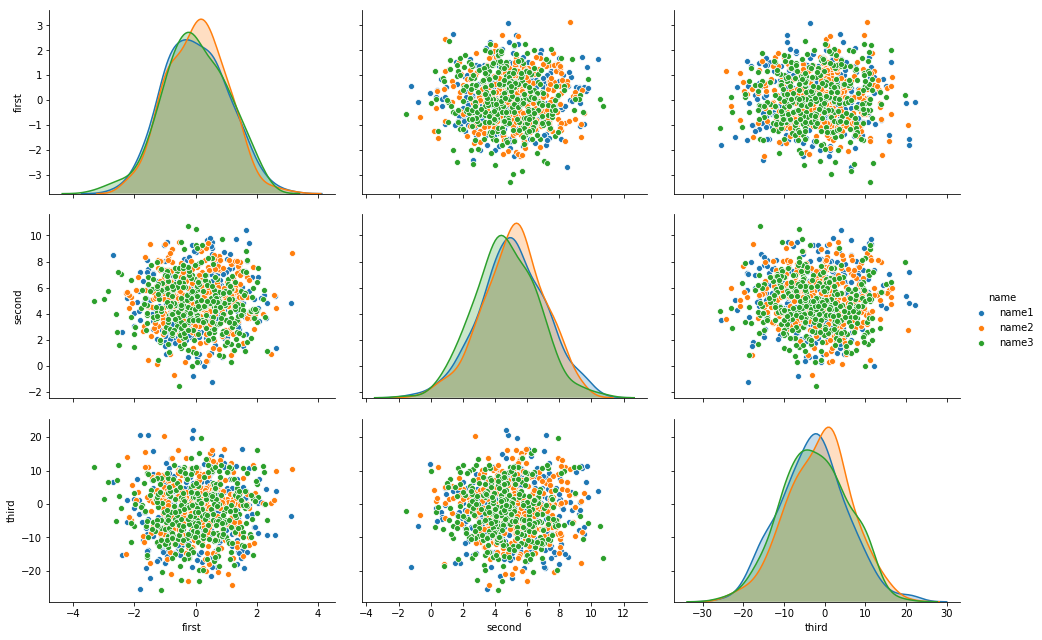

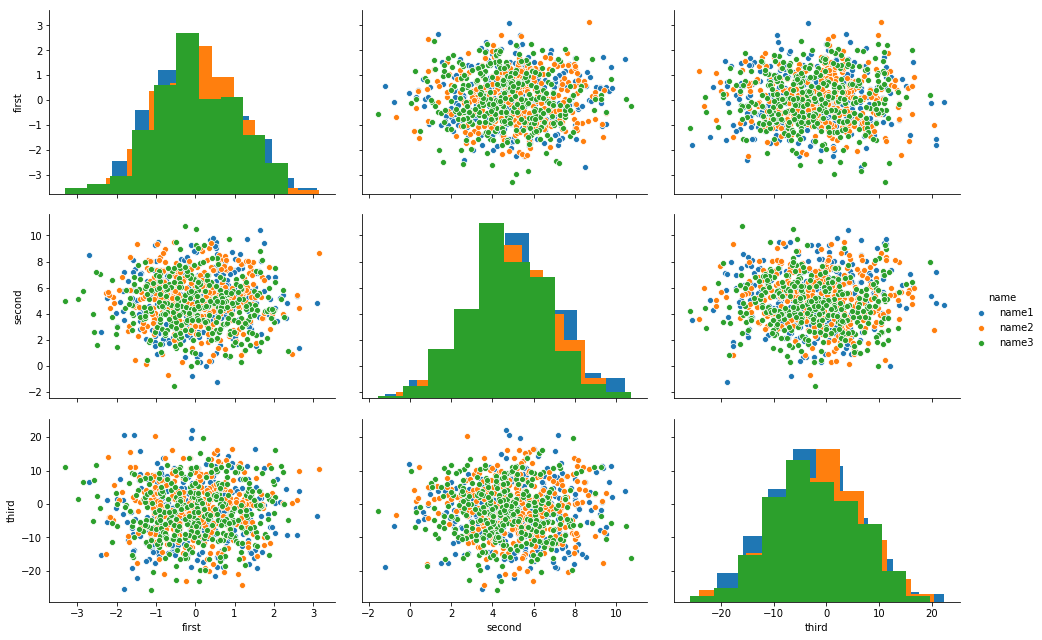

In [9]:
plt.close("all")
df = pd.DataFrame([
     np.random.normal(0,1,1000)
    ,np.random.normal(5,2,1000)
    ,np.random.normal(-2,8,1000)    
])
df = df.T
df['name'] = ['name1']*333 + ['name2']*333 + ['name3']*334
df.columns = ['first', 'second', 'third','name']
display(df.head())

fig3 = sns.pairplot(df, diag_kind = 'kde', height=3, aspect=1.5)
plt.show()

fig1 = sns.pairplot(df, hue = 'name', height=3, aspect=1.5)
plt.show()

fig2 = sns.pairplot(df, hue = 'name', diag_kind = 'hist', height=3, aspect=1.5)
plt.show()


<h2>Box/violin/swarm plots</h2>

In [10]:
plt.close("all")
tips = sns.load_dataset("tips")
display(tips.head())

fig, axes = plt.subplots(nrows = 2, ncols = 3)
fig.set_size_inches(17, 10)

sns.boxplot(x = "day", y = "total_bill", data = tips, ax = axes[0,0])
sns.boxplot(x = "day", y = "total_bill", hue = "smoker", data = tips, ax = axes[0,1], palette = 'Set3')
sns.violinplot(x = "day", y = "total_bill", hue = "smoker", data = tips, ax = axes[0,2], palette = 'Set3')
sns.swarmplot(x = "day", y = "total_bill", data = tips, ax = axes[1,0])
sns.boxplot(x = "day", y = "total_bill", data = tips, ax = axes[1,1])
sns.swarmplot(x = "day", y = "total_bill", data = tips, color=".25", ax = axes[1,1])
sns.violinplot(x="day", y="total_bill", hue="sex",data=tips, palette="Set2", split=True,scale="count", ax = axes[1,2])

fig

URLError: <urlopen error [WinError 10061] No connection could be made because the target machine actively refused it>

In [ ]:
plt.close("all")
#fig, ax = plt.subplots(nrows = 1, ncols = 1)
sns.factorplot(x="sex", y="total_bill",hue="smoker", col="time",data=tips, kind="box")
#fig
plt.show()

<h2>Facet grids</h2>

In [11]:
plt.close("all")
tips = sns.load_dataset("tips")
display(tips.head())

bins = np.arange(0, 65, 5)
g = sns.FacetGrid(tips, col = "time", row = "smoker", size = 3, aspect = 1)
g = (g.map(plt.hist, "total_bill", color = 'r', bins = bins)
        .set_titles("{col_name}, {row_name}")
        .set_axis_labels("Total bill (US Dollars)", "No of occurences")
    )

pal = dict(Yes = "seagreen", No = "gray")
g2 = sns.FacetGrid(tips, col = "time",  hue = "smoker", palette = pal)
g2 = (g2.map(plt.scatter, "total_bill", "tip", edgecolor="w")
          .add_legend())

plt.show()

URLError: <urlopen error [WinError 10061] No connection could be made because the target machine actively refused it>

<h2>Reg plot</h2>

In [17]:
plt.close("all")
tips = sns.load_dataset("tips")
mapping = {'Female':0, 'Male':1}
tips['sex_bin'] = tips['sex'].map(mapping)
display(tips.head())

fig, axes = plt.subplots(nrows = 2, ncols = 3)
fig.set_size_inches(17, 10)

p1 = sns.regplot(x = "total_bill", y = "tip", data = tips, ci = 95, ax = axes[0,0])
sns.regplot(x = "size", y = "tip", order = 2, data = tips, ci = 95, ax = axes[0,1])
sns.regplot(x = "total_bill", y = "sex_bin", data = tips, logistic = True, ax = axes[0,2])
sns.regplot(x = "size", y = "total_bill", data = tips, x_estimator = np.mean, ax = axes[1,0])

fig

URLError: <urlopen error [WinError 10061] No connection could be made because the target machine actively refused it>

In [12]:
# Sometimes we might want to calculate the slope results from regplot
# Seaborn does not automatically proveide this, but we can do it ourselves

from scipy.stats import linregress

slope, intercept, r_value, p_value, std_err = linregress(x = p1.get_lines()[0].get_xdata(), y = p1.get_lines()[0].get_ydata())

print('Slope = {0:.3f}, intercept = {1:.3f}, p_val = {2:.3f}'.format(slope, intercept, p_value))

NameError: name 'p1' is not defined

<h2>lmplot</h2>
This function combines regplot() and FacetGrid. It is intended as a convenient interface to fit regression models across conditional subsets of a dataset.

In [13]:
plt.close("all")
iris = sns.load_dataset("iris")
tips = sns.load_dataset("tips")

display_side_by_side(iris.head(), tips.head())

g = sns.lmplot(x = "sepal_length", y = "sepal_width", data = iris, hue = "species", truncate = True, size = 5)
g.set_axis_labels("Sepal length (mm)", "Sepal width (mm)")

g2 = sns.lmplot(x = "size", y = "total_bill",data = tips, col = "day", hue = "day", col_wrap = 4) # remove hue for same color

g3 = sns.lmplot(x = "total_bill", y = "tip", row = "sex", col = "time", data = tips, size = 3)
g3 = (g3.set_axis_labels("Total bill (US Dollars)", "Tip")
        .set(xlim = (0, 60), ylim = (0, 12), xticks = [10, 30, 50], yticks = [2, 6, 10])
        .fig.subplots_adjust(wspace = 0.02))

plt.show()

URLError: <urlopen error [WinError 10061] No connection could be made because the target machine actively refused it>

## Heat map

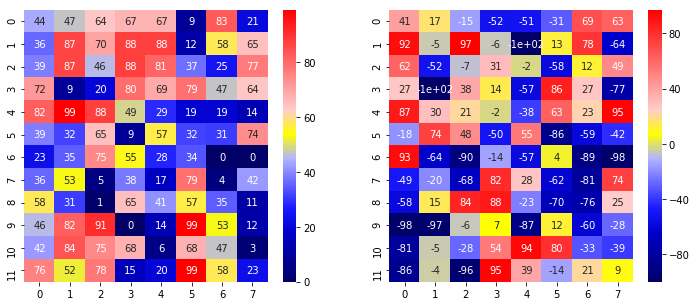

In [14]:
np.random.seed(0)
import matplotlib.colors as mcolors

x1 = np.random.randint(0,100,size=(12,8))
x2 = np.random.randint(-100,100,size=(12,8))

fig, axes = plt.subplots(ncols=2)
fig.set_size_inches(12, 5)

cmap = mcolors.LinearSegmentedColormap.from_list("n",['#000066','#000099','#0000cc','#1a1aff','#6666ff','#b3b3ff',
                       '#ffff00','#ffcccc','#ff9999','#ff6666','#ff3333','#ff0000'])
norm = plt.Normalize(-100,100)

sns.heatmap(x1, ax=axes[0], cmap=cmap, norm=norm, annot=True)
sns.heatmap(x2, ax=axes[1], cmap=cmap, norm=norm, annot=True)

plt.show()

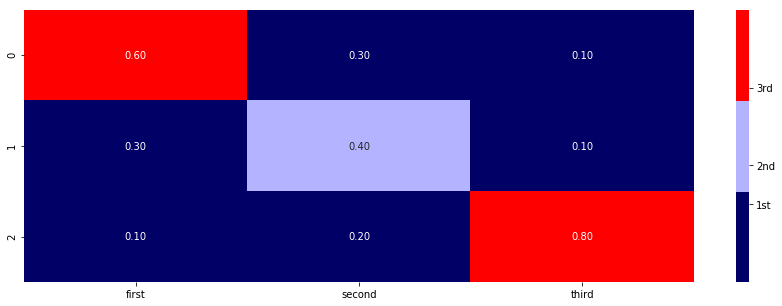

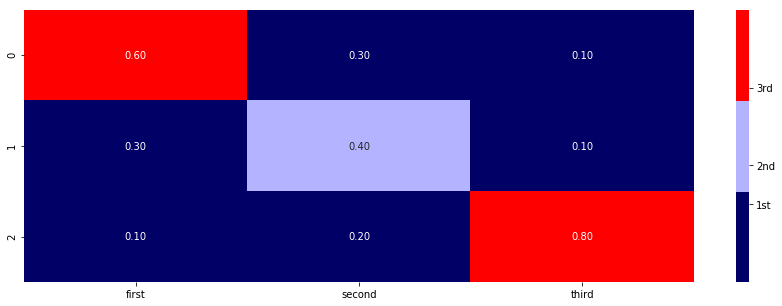

In [15]:
import matplotlib.colors as mcolors

df = pd.DataFrame({'first': [0.6, 0.3, 0.1], 'second': [0.3, 0.4, 0.2], 'third': [0.1,0.1,0.8] })
plt.close('all')
fig = plt.figure()
fig.set_size_inches(15, 5)

cmap = mcolors.LinearSegmentedColormap.from_list("Custom",['#000066','#b3b3ff','#ff0000'],len(df.columns))

ax = sns.heatmap(df, cmap = cmap, annot=True, fmt = '0.2f')
colorbar = ax.collections[0].colorbar
colorbar.set_ticks([0.3, 0.4, 0.6])
colorbar.set_ticklabels(['1st', '2nd', '3rd'])

fig

## Custom colors from seaborn palette

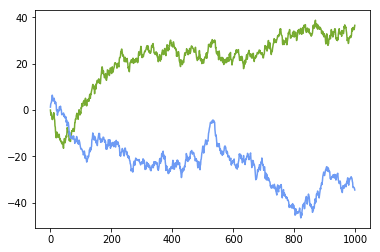

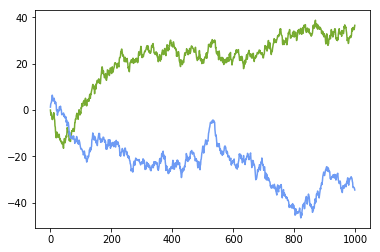

In [16]:
import matplotlib.colors as mcolors

# colros
colors = sns.color_palette("husl", 20)
cmap = mcolors.LinearSegmentedColormap.from_list("Custom", colors, len(colors))

# Data
np.random.seed(2525)
x = np.arange(1000)
y1 = np.random.randn(1000).cumsum()
y2 = np.random.randn(1000).cumsum()

# Figure
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.plot(x,y1, label = 'first_line', c = cmap(0.3))
ax1.plot(x,y2, label = 'second_line', c = cmap(0.7))

fig